# Import Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

random_state = 3
plt.rcParams['text.usetex'] = True

In [2]:
regression_data = pd.read_csv("Data/RegressionData.csv")
regression_data.head()

,Index,DT,Energy,Jan,Feb,Mar,Apr,May,Jun,Jul,...,LagHDHot,SpringHD,FallHD,SatHD,SunHD,WindCold,WindHot,AvgClouds,CloudsCold,CloudsHot
0,0,1/1/17,242.69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.23,43.15,0.0,4.39,36.12,0.0
1,1,1/2/17,257.06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,56.01,0.0,8.00,79.17,0.0
2,2,1/3/17,265.35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,54.25,0.0,7.75,74.65,0.0
3,3,1/4/17,253.79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,52.80,0.0,3.71,22.77,0.0
4,4,1/5/17,305.91,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,78.75,0.0,6.06,124.28,0.0


In [3]:
X = regression_data.values[:, 3:]
y = regression_data.values[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = random_state)

In [4]:
regression_data.columns

Index(['Index', 'DT', 'Energy', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'BankHols', 'RetailHols',
       'WkBeforeXMas', 'WkAfterXMas', 'Trend2010', 'CD60Cap5', 'CD65Cap5',
       'CD70Cap5', 'CD75Cap5', 'CD80', 'LagCD', 'LagCDCold', 'SpringCD',
       'FallCD', 'SatCD', 'SunCD', 'HD60Cap5', 'HD55Cap5', 'HD50Cap5',
       'HD45Cap10', 'HD35', 'LagHD', 'LagHDHot', 'SpringHD', 'FallHD', 'SatHD',
       'SunHD', 'WindCold', 'WindHot', 'AvgClouds', 'CloudsCold', 'CloudsHot'],
      dtype='object')

In [5]:
# np.unique(regression_data['HD60Cap5'].values)

In [6]:
# np.unique(regression_data['CD60Cap5'].values)

In [7]:
cols = list(range(13))
boosting_data = pd.read_csv("Data/BoostingData.csv", usecols = cols)
boosting_data.head()

,Index,DT,Energy,Month,DayOfWeek,BankHols,RetailHols,Trend2010,AvgDB,LagDB,Lag2DB,AvgClouds,AvgWind
0,0,1/1/17,242.69,1.0,7.0,0.0,0.0,7.00,46.77,36.66,36.72,4.39,5.24
1,1,1/2/17,257.06,1.0,1.0,0.0,0.0,7.01,45.10,46.77,36.66,8.00,5.66
2,2,1/3/17,265.35,1.0,2.0,0.0,0.0,7.01,45.37,45.10,46.77,7.75,5.63
3,3,1/4/17,253.79,1.0,3.0,0.0,0.0,7.01,48.87,45.37,45.10,3.71,8.61
4,4,1/5/17,305.91,1.0,4.0,0.0,0.0,7.01,34.49,48.87,45.37,6.06,3.84


In [8]:
boosting_data.columns

Index(['Index', 'DT', 'Energy', 'Month', 'DayOfWeek', 'BankHols', 'RetailHols',
       'Trend2010', 'AvgDB', 'LagDB', 'Lag2DB', 'AvgClouds', 'AvgWind'],
      dtype='object')

### Linear Regression (regression data)

In [9]:
from sklearn.linear_model import LinearRegression

full_lin_model = LinearRegression().fit(X_train, y_train)
y_pred = full_lin_model.predict(X_test)

mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.abs(y_test - y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test))

print(f'mse = {mse}')
print(f'mae = {mae}')
print(f'mape = {mape}')

mse = 23.965880777038592
mae = 3.76255481800175
mape = 0.013621622894780364


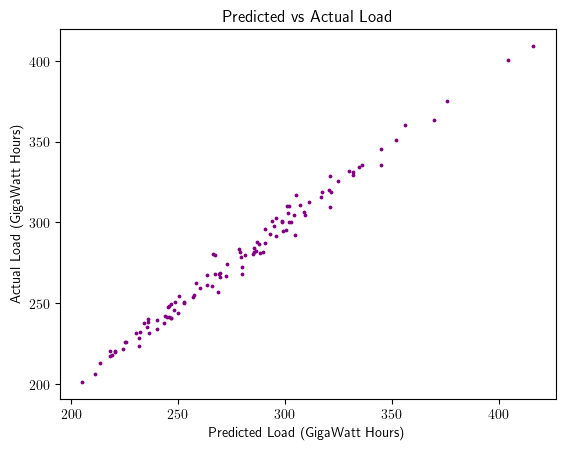

In [10]:
plt.scatter(y_pred, y_test, s = 3, color = 'purple')
plt.xlabel('Predicted Load (GigaWatt Hours)')
plt.ylabel('Actual Load (GigaWatt Hours)')
plt.title('Predicted vs Actual Load')
plt.savefig("Plots/Predicted_Actual_LinReg.png")
plt.show()

### See if I can further split the prediction between seasons and holidays like in the paper

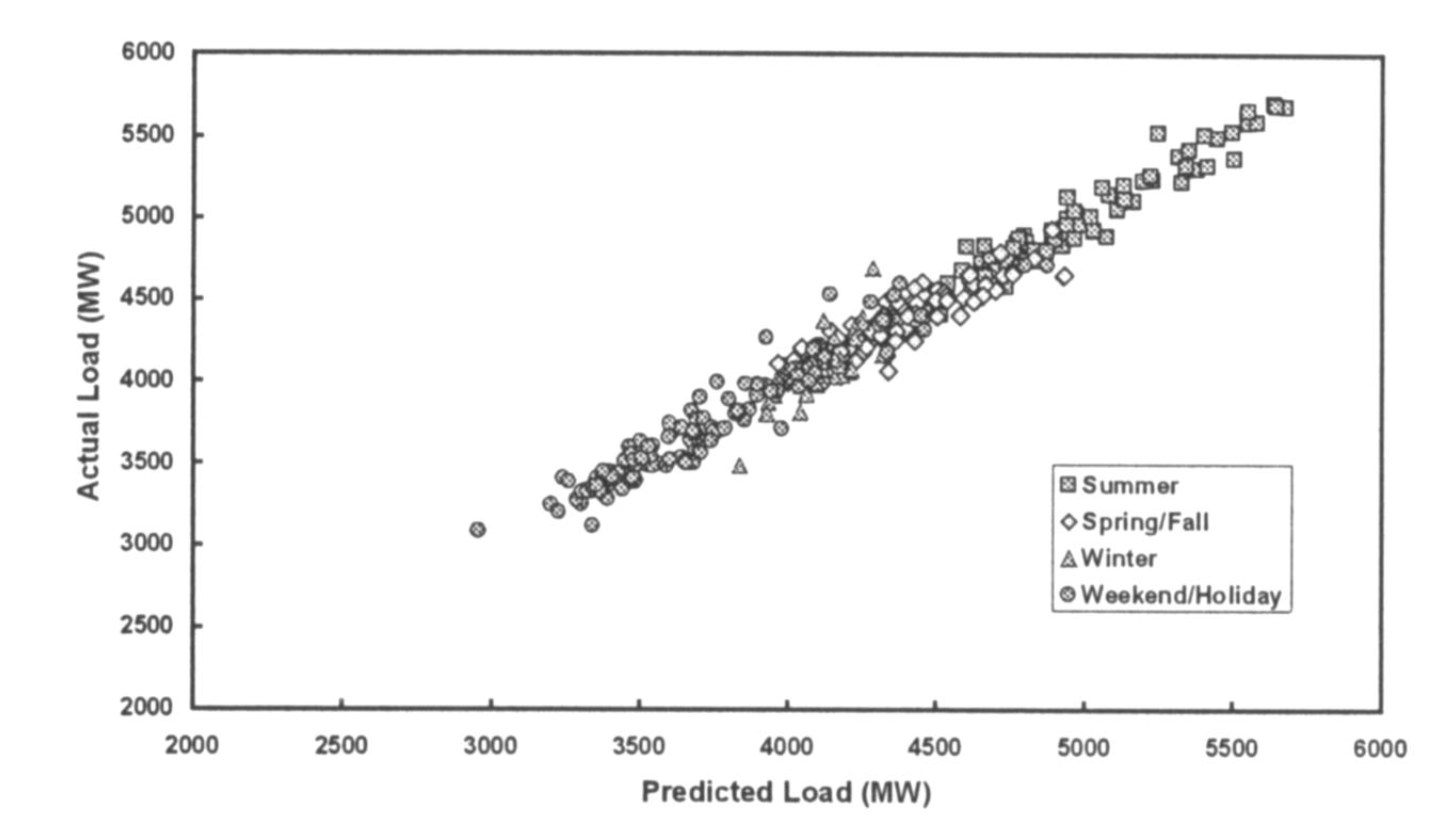

### Quadratic Regression (boosting data)

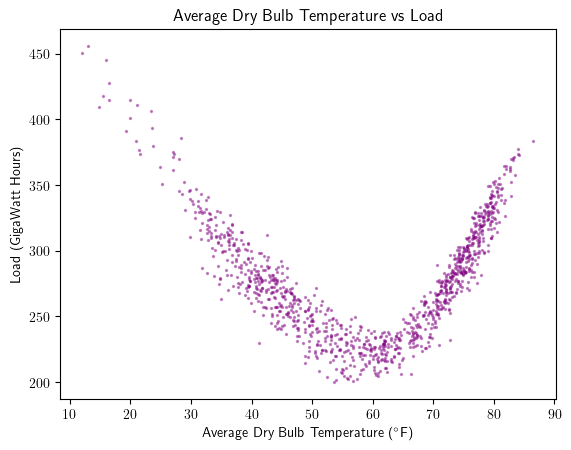

In [11]:
bulb = boosting_data['AvgDB'].values
load = boosting_data['Energy'].values

plt.scatter(bulb, load, s = 2, alpha = 0.4, color = 'purple')
plt.xlabel(r'Average Dry Bulb Temperature ($^{\circ}$F)')
plt.ylabel('Load (GigaWatt Hours)')
plt.title('Average Dry Bulb Temperature vs Load')
plt.savefig("AvgDB_Load_Scatter.png")
plt.show()

$$H(x) = w_0 + w_1 \phi_1(x) + w_2 \phi_2(x)$$
where $\phi_1(x) = x$, $\phi_2(x) = x^2$

In [12]:
x = np.zeros([len(bulb), 2])
x[: , 0] = bulb
x[: , 1] = bulb ** 2

phi_train, phi_test, load_train, load_test = train_test_split(x, load, test_size = 0.1, random_state = random_state)
quad = LinearRegression().fit(phi_train, load_train)
load_pred = quad.predict(phi_test)

quad_mse = np.mean((load_pred - load_test) ** 2)
quad_mae = np.mean(np.abs((load_pred - load_test)))
quad_mape = np.mean(np.abs((load_pred - load_test) / y_test))

print(f'mse = {quad_mse}')
print(f'mae = {quad_mae}')
print(f'mape = {quad_mape}')

print(f'w1, w2 = {quad.coef_}')
print(f'w0 = {quad.intercept_}')


mse = 289.306571687132
mae = 12.192432811024585
mape = 0.04452473530774171
w1, w2 = [-17.81612148   0.15925417]
w0 = 730.7833349086523


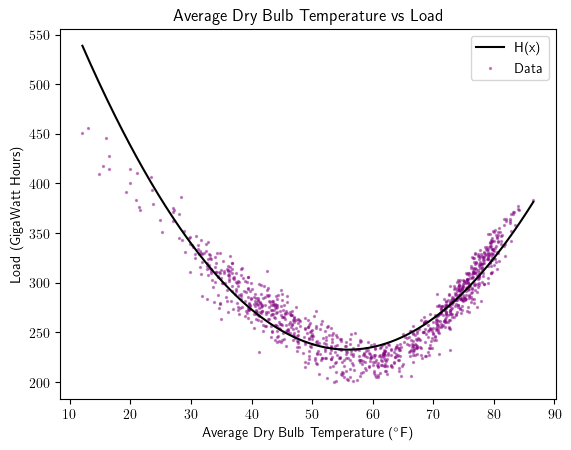

In [13]:
w0 = quad.intercept_
w1 = quad.coef_[0]
w2 = quad.coef_[1]

bulb_x = np.linspace(np.min(bulb), np.max(bulb), 500)
h = w0 + w1 * bulb_x + w2 * bulb_x ** 2

plt.plot(bulb_x, h, color = 'k', label = 'H(x)')
plt.scatter(bulb, load, color = 'purple', alpha = 0.4, s = 2, label = 'Data')
plt.xlabel(r'Average Dry Bulb Temperature ($^{\circ}$F)')
plt.ylabel('Load (GigaWatt Hours)')
plt.title('Average Dry Bulb Temperature vs Load')
plt.legend()
plt.savefig("AvgDB_Load_Quad.png")
plt.show()

### PCA (boosting data)

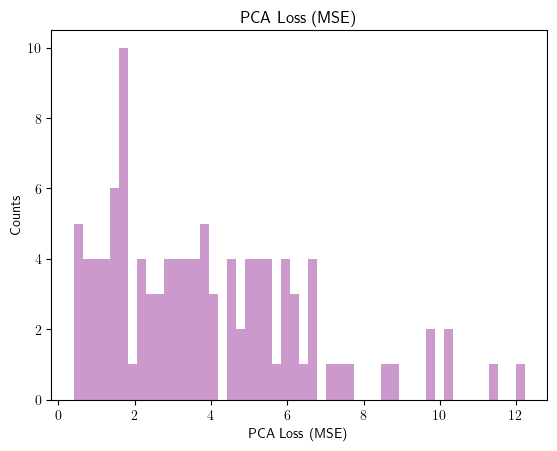

[0.90855287 0.04481056]
[[2.71023659e-02 4.30888865e-04 1.45441901e-04 4.38399256e-05
  2.45681567e-03 5.68720911e-01 5.86907458e-01 5.75443941e-01
  5.51198574e-03 1.37574304e-02]
 [4.55254317e-02 1.77477390e-02 5.91203189e-04 1.14140173e-03
  3.36555253e-03 7.07552048e-01 7.66985836e-03 7.04231489e-01
  1.23278303e-03 3.11004372e-02]]


In [14]:
from sklearn.decomposition import PCA

pca_data_train, pca_data_test, pca_load_train, pca_load_test = train_test_split(boosting_data.drop(columns = ['Index', 'DT', 'Energy']), load, test_size = 0.1, random_state = random_state)
pca = PCA(n_components = 2).fit(pca_data_train)

transformed_pca = pca.transform(pca_data_test)
reverted_pca = pca.inverse_transform(transformed_pca)
pca_loss = np.mean((pca_data_test - reverted_pca) ** 2, axis = 1)

plt.hist(pca_loss, bins = 50, color = 'purple', alpha = 0.4)
plt.xlabel('PCA Loss (MSE)')
plt.ylabel('Counts')
plt.title('PCA Loss (MSE)')
plt.savefig("PCA_Loss_MSE.png")
plt.show()

print(pca.explained_variance_ratio_)
print(abs(pca.components_))

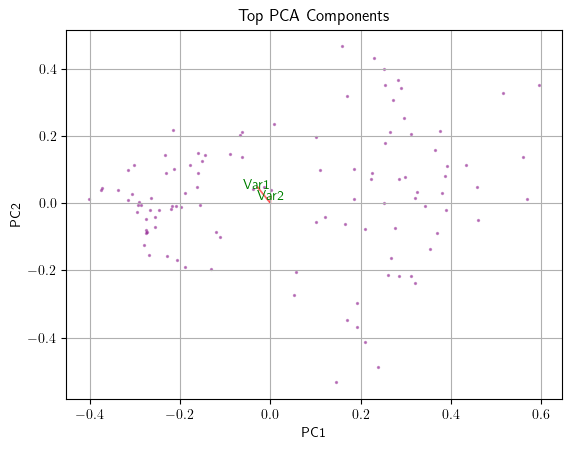

In [15]:
def myplot(score, coeff, labels = None):
    pc1 = score[: , 0]
    pc2 = score[: , 1]
    n = coeff.shape[0]
    scalex = 1.0 / (pc1.max() - pc1.min())
    scaley = 1.0 / (pc2.max() - pc2.min())
    plt.scatter(pc1 * scalex, pc2 * scaley, s = 2, alpha = 0.4, color = 'purple')
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0] * 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(transformed_pca, np.transpose(pca.components_)[0:2, :])
plt.title('Top PCA Components')
plt.savefig("Top_PCA_Components.png")
plt.show()


plt.scatter(transformed_pca[:, 0], transformed_pca[:, 1], alpha = 0.4, s = 2, color = 'purple')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Top PCA Components')
plt.show()

In [16]:
feat_order = np.argsort(abs(pca.components_[0]))[::-1]
cols = boosting_data.drop(columns = ['Index', 'DT', 'Energy']).columns

for val in feat_order:
    print(val + 3, cols[val])

9 LagDB
10 Lag2DB
8 AvgDB
3 Month
12 AvgWind
11 AvgClouds
7 Trend2010
4 DayOfWeek
5 BankHols
6 RetailHols


### Try a regression with just the top PCA components

In [17]:
mini_boost = boosting_data[['LagDB', 'Lag2DB', 'AvgDB']]
reg_mini_train, reg_mini_test, reg_load_train, reg_load_test = train_test_split(mini_boost, load, test_size = 0.1, random_state = random_state)
mini = LinearRegression().fit(reg_mini_train, reg_load_train)
mini_load_pred = mini.predict(reg_mini_test)

mini_mse = np.mean((mini_load_pred - reg_load_test) ** 2)
mini_mae = np.mean(np.abs((mini_load_pred - reg_load_test)))
mini_mape = np.mean(np.abs((mini_load_pred - reg_load_test)) / reg_load_test)

print(f'mse = {mini_mse}')
print(f'mae = {mini_mae}')
print(f'mape = {mini_mape}')

print(f'w1, w2, w3 = {mini.coef_}')
print(f'w0 = {mini.intercept_}')

mse = 1715.4588880498825
mae = 33.392917177333935
mape = 0.12095080168950809
w1, w2, w3 = [-0.47713032  0.69592012 -0.10565459]
w0 = 268.798528323549


the pca'ed version sucks ??



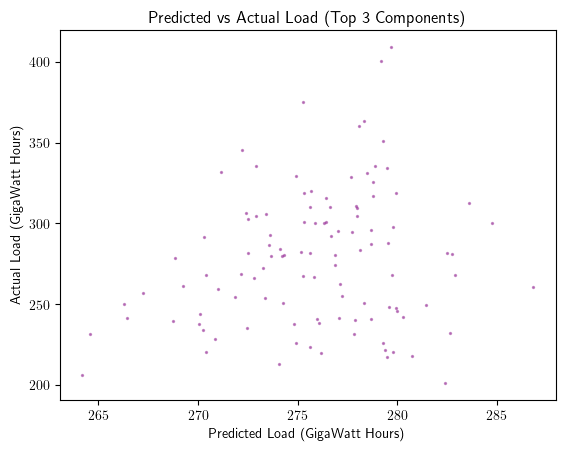

In [18]:
plt.scatter(mini_load_pred, reg_load_test, alpha = 0.4, s = 2, color = 'purple')
plt.xlabel('Predicted Load (GigaWatt Hours)')
plt.ylabel('Actual Load (GigaWatt Hours)')
plt.title('Predicted vs Actual Load (Top 3 Components)')
plt.savefig("Predicted_Actual_Top_3.png")
plt.show()

# Cross Validation

100%|██████████| 100/100 [00:05<00:00, 17.47it/s]


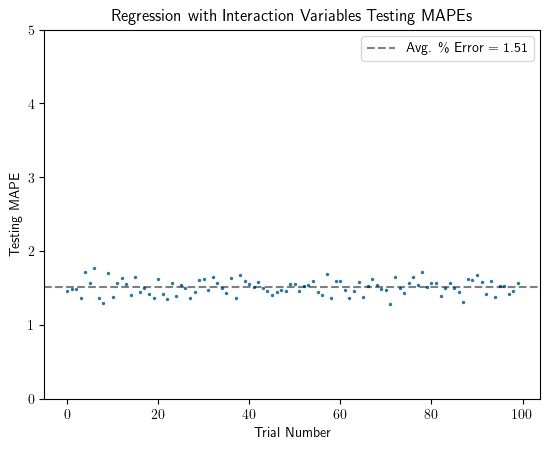

In [26]:
# Smart Regression CV
regression_data = pd.read_csv("Data/RegressionData.csv")
X = regression_data.values[:, 3:]
y = regression_data.values[:, 2]
mapes = []
for i in tqdm.tqdm(range(100)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = i)
    full_lin_model = LinearRegression().fit(X_train, y_train)
    y_pred = full_lin_model.predict(X_test)
    mape = np.mean(np.abs(y_test - y_pred) / y_test)
    mapes.append(mape)

plt.scatter(list(range(100)), np.array(mapes) * 100, s = 2)
plt.axhline(np.mean(mapes) * 100, linestyle = '--', color = 'black', alpha = 0.5, 
            label = f'Avg. \% Error = {np.round(np.mean(mapes), 4):.2%}')
plt.xlabel("Trial Number")
plt.ylabel('Testing MAPE')
plt.title("Regression with Interaction Variables Testing MAPEs")
plt.ylim(0,5)
plt.legend()
plt.savefig("Plots/smart_regression_cv_test_mapes")
plt.show()

100%|██████████| 100/100 [00:08<00:00, 12.29it/s]


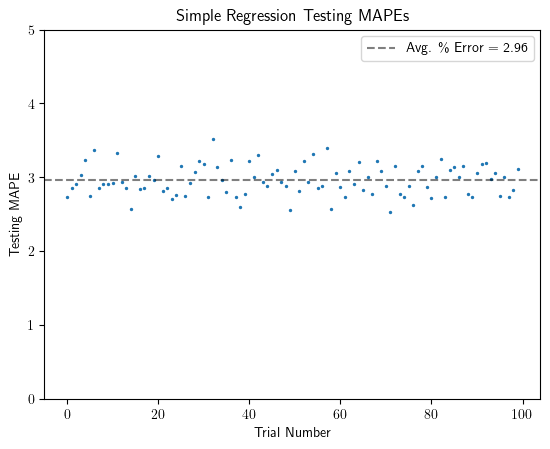

In [25]:
# Dumb Regression CV
regression_data = pd.read_csv("Data/NNData.csv")
regression_data["AvgDBSquared"] = regression_data["AvgDB"] ** 2
X = regression_data.values[:, 3:]
y = regression_data.values[:, 2]
mapes = []
for i in tqdm.tqdm(range(100)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = i)
    full_lin_model = LinearRegression().fit(X_train, y_train)
    y_pred = full_lin_model.predict(X_test)
    mape = np.mean(np.abs(y_test - y_pred) / y_test)
    mapes.append(mape)

plt.scatter(list(range(100)), np.array(mapes) * 100, s = 2)
plt.axhline(np.mean(mapes) * 100, linestyle = '--', color = 'black', alpha = 0.5, 
            label = f'Avg. \% Error = {np.round(np.mean(mapes), 4):.2%}')
plt.xlabel("Trial Number")
plt.ylabel('Testing MAPE')
plt.ylim(0,5)
plt.title("Simple Regression Testing MAPEs")
plt.legend()
plt.savefig("Plots/regression_cv_test_mapes")
plt.show()